In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

calendar_df = pd.read_csv('./airbnb_seattle_dataset/calendar.csv')
calendar_df.head()


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [2]:
listings_df = pd.read_csv('./airbnb_seattle_dataset/listings.csv')
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
reviews_df = pd.read_csv('./airbnb_seattle_dataset/reviews.csv')
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [4]:
####### 1. what is the most common price of rooms ##############

# get the unique list from listing.xsv
listing_ids = listings_df.id
print(len(listing_ids))
# print(type(listing_id))  #<-- pandas.core.series.Series

#remove NaN in price column of calendar_df
NaN_price_dropped_calender_df = calendar_df.dropna(subset=['price'], how='any')
NaN_price_dropped_calender_df.head()


3818


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00


In [5]:
price_ls = []
for listing_id in listing_ids.iteritems(): 
    # filter with the given listing_id
    temp_df = NaN_price_dropped_calender_df[NaN_price_dropped_calender_df['listing_id']==listing_id[1]]
#         print(temp_df)
    # than, get 'price' of the first row
    price = 0
    if(temp_df.shape[0] > 1):  # this not exist??? 4550099
        price_str = temp_df.iloc[0]['price'][1:]   #remove dollar sign
        price = float(price_str.replace(",",""))  # remove ','
    # make the list of prices
    price_ls.append(price)
        
len(price_ls)

3818

In [6]:
# create Dataframe 
listing_ids_prices_df = pd.DataFrame({'listing_id':listing_ids, 'price ($)':price_ls})

listing_ids_prices_df.head()


,listing_id,price ($)
0,241032,85.0
1,953595,125.0
2,3308979,975.0
3,7421966,100.0
4,278830,600.0


In [7]:
listing_ids_prices_df = listing_ids_prices_df.sort_values('price ($)', ascending=True)


In [8]:
price_vals = listing_ids_prices_df['price ($)'].value_counts()

print(type(price_vals))

# conver series to df, in order to 
price_cnt_df = pd.DataFrame({'price':price_vals.index, 'counts':price_vals.values})
# price_cnt_df.head()

# remove the rows, which counts is less than 80
price_cnt_gt_df = price_cnt_df[price_cnt_df['counts'] >= 80]

price_cnt_gt_df



<class 'pandas.core.series.Series'>


,price,counts
0,100.0,159
1,150.0,128
2,75.0,126
3,99.0,116
4,0.0,102
5,65.0,102
6,90.0,100
7,95.0,99
8,125.0,93
9,85.0,91


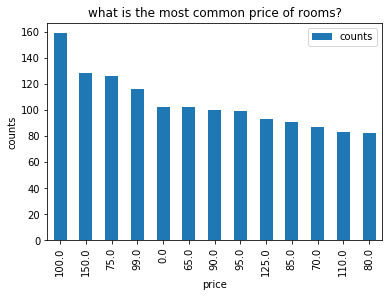

[ANSWER]
the most common price is $100.0.
It can be speculated that the most of airbnb users are willing to pay $100, which causes the room owner set the price as $100


In [9]:

price_cnt_gt_df.plot(x='price', y='counts', kind='bar')
plt.title("what is the most common price of rooms?")
plt.xlabel("price")
plt.ylabel("counts")
plt.show()

print("[ANSWER]")
print("the most common price is $100.0.")
print("It can be speculated that the most of airbnb users are willing to pay $100, which causes the room owner set the price as $100")

In [10]:
###### 2. during which month of a year is high/low season based on availability of rooms

# get the range of 'date' - 2016.01 ~ 2017.01
date_avail_df = calendar_df.sort_values('date', ascending=False)

# add 'month' using 'DatetimeIndex'
date_avail_df['month'] = pd.DatetimeIndex(date_avail_df['date']).month

date_avail_df['month'].unique()


array([ 1, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2])

In [11]:
month_ls = [1,2,3,4,5,6,7,8,9,10,11,12]
t_ls = []
f_ls = []
# count of 'f', 't' for each month
for month in month_ls:
    avail_values = date_avail_df[date_avail_df['month']==month].available.value_counts()
#     print(type(avail_values))
#     print(avail_values)
#     print(avail_values[0]) # num of t
#     print(avail_values[1]) # num of f
    t_ls.append(avail_values[0])
    f_ls.append(avail_values[1])

In [12]:
# df with month, num of t, num of f
avail_per_month_df = pd.DataFrame({'month':month_ls, 'Empty':t_ls, 'Occupied':f_ls})
avail_per_month_df

,month,Empty,Occupied
0,1,64937,49603
1,2,73321,37401
2,3,83938,34420
3,4,76037,38503
4,5,79971,38387
5,6,77244,37296
6,7,74222,44136
7,8,76347,42011
8,9,77246,37294
9,10,82438,35920


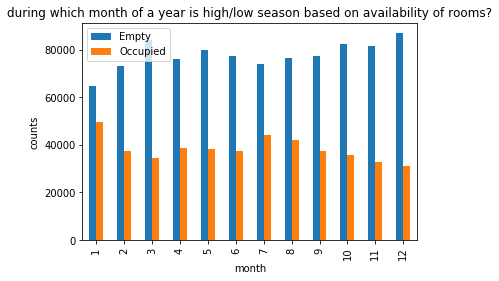

[ANSWER]
July & August are high season and November & December are low season.
During the low season, airbnb can start promotion to boost up the revenue


In [14]:
avail_per_month_df.plot(x='month', y=['Empty','Occupied'], kind='bar')
plt.title("during which month of a year is high/low season based on availability of rooms?")
plt.xlabel("month")
plt.ylabel("counts")
plt.show()

print("[ANSWER]")
print("July & August are high season and November & December are low season.")
print("During the low season, airbnb can start promotion to boost up the revenue")

In [ ]:
###### 3. the room with higher price is more available comparing to the one with less price? 

# remove NaN in price column of calendar_df

# get the average price of available room 

# get the average price of non-available room 

# compare 